# Random Signals and LTI-Systems

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## The Wiener Filter

The [Wiener filter](https://en.wikipedia.org/wiki/Wiener_filter), named after [*Nobert Wiener*](https://en.wikipedia.org/wiki/Norbert_Wiener), aims at estimating an unknown random signal by filtering a noisy observation of the signal. It has a wide variety of applications in noise reduction, system identification, deconvolution and signal detection. For instance, the Wiener filter can be used to denoise audio signals, like speech, or to remove noise from a picture.

### Signal Model

The following signal model is underlying the following derivation of the Wiener filter

![Illustration: Signal model for the Wiener filter](../images/wiener_filter-1.png)

The random signal $s[k]$ is subject to distortion by the linear time-invariant (LTI) system $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and additive noise $n[k]$, resulting in the observed signal $x[k] = s[k] * g[k] + n[k]$. The additive noise $n[k]$ is assumed to be uncorrelated from $s[k]$. It is furthermore assumed that all random signals are weakly stationary. This distortion model holds for many practical problems, like e.g. the measurement of a physical quantity by a sensor. 

The goal of the Wiener filter is to design the LTI system $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ such that the output signal $y[k]$ matches $s[k]$ as best as possible. In order to quantify this, the error signal

$$e[k] = y[k] - s[k]$$

is introduced. The quadratic mean of the error $e[k]$ is then given as

$$E \{ |e[k]|^2 \} = \frac{1}{2 \pi} \int\limits_{-\pi}^{\pi} \Phi_{ee}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \,\mathrm{d}\Omega = \varphi_{ee}[\kappa=0]$$

which is also known as [*mean squared error*](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE). We aim at the minimization of the MSE between the original signal $s[k]$ and its estimate $y[k]$.

### Transfer Function of the Wiener Filter

At first, the Wiener filter shall only have access to the observed signal $x[k]$ and some statistical measures. It is assumed that the cross-power spectral density $\Phi_{xs}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ between the observed signal $x[k]$ and the original signal $s[k]$, and the power spectral density (PSD) of the observed signal $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ are known. This knowledge can either be gained by estimating both from measurements taken at an actual system or by using suitable statistical models.

The optimal filter is found by minimizing the MSE $E \{ |e[k]|^2 \}$ with respect to the transfer function $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. The solution of this optimization problem goes beyond the scope of this notebook and can be found in the literature, e.g. [[Girod et. al](../index.ipynb#Literature)]. The transfer function of the Wiener filter is given as

$$ H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\Phi_{sx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})} = \frac{\Phi_{xs}(\mathrm{e}^{\,-\mathrm{j}\,\Omega})}{\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}$$

No knowledge on the actual distortion process is required. Only the PSDs $\Phi_{sx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ have to be known in order to estimate $s[k]$ from $x[k]$ in the minimum MSE sense. Care has to be taken that the filter $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is causal and stable in practical applications.

**Example**

The following example considers the estimation of the original signal from a distorted observation. It is assumed that the original signal is $s[k] = \sin[\Omega_0\,k]$ which is distorted by an LTI system and additive normally distributed zero-mean white noise with $\sigma_n^2 = 0.1$. The PSDs $\Phi_{sx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ are estimated from $s[k]$ and $x[k]$ using the [Welch technique](../spectral_estimation_random_signals/welch_method.ipynb). The Wiener filter is applied to the observation $x[k]$ in order to compute the estimate $y[k]$ of $s[k]$.

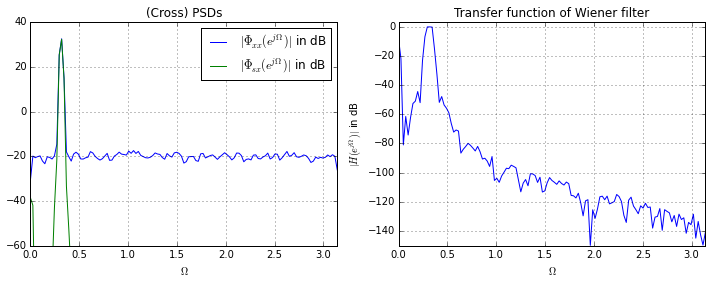

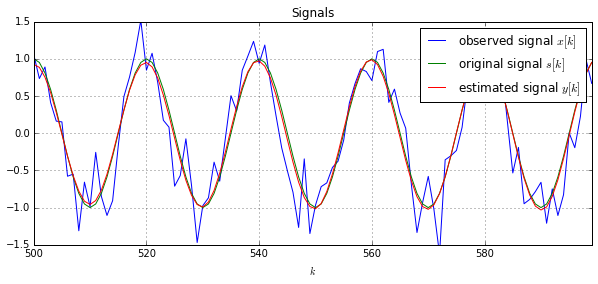

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 8129  # number of samples
M = 256  # length of Wiener filter
Om0 = 0.1*np.pi  # frequency of original signal
N0 = 0.1  # PSD of additive white noise

# generate original signal
s = np.cos(Om0 * np.arange(N)) 
# generate observed signal
g = 1/20*np.asarray([1, 2, 3, 4, 5, 4, 3, 2, 1])
n = np.random.normal(size=N, scale=np.sqrt(N0))
x = np.convolve(s, g, mode='same') + n
# estimate (cross) PSDs using Welch technique
f, Pxx = sig.csd(x, x, nperseg=M)
f, Psx = sig.csd(s, x, nperseg=M)
# compute Wiener filter
H = Psx/Pxx
H = H * np.exp(-1j*2*np.pi/len(H)*np.arange(len(H))*(len(H)//2))  # shift for causal filter
h = np.fft.irfft(H)
# apply Wiener filter to observation
y = np.convolve(x, h, mode='same')

# plot (cross) PSDs
Om = np.linspace(0, np.pi, num=len(H))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(Om, 20*np.log10(np.abs(.5*Pxx)), label=r'$| \Phi_{xx}(e^{j \Omega}) |$ in dB')
plt.plot(Om, 20*np.log10(np.abs(.5*Psx)), label=r'$| \Phi_{sx}(e^{j \Omega}) |$ in dB')
plt.title('(Cross) PSDs')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -60, 40])
plt.grid()

# plot transfer function of Wiener filter
plt.subplot(122)
plt.plot(Om, 20*np.log10(np.abs(H)))
plt.title('Transfer function of Wiener filter')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$| H(e^{j \Omega}) |$ in dB')
plt.axis([0, np.pi, -150, 3])
plt.grid()
plt.tight_layout()

# plot signals
idx = np.arange(500, 600)
plt.figure(figsize=(10, 4))
plt.plot(idx, x[idx], label=r'observed signal $x[k]$')
plt.plot(idx, s[idx], label=r'original signal $s[k]$')
plt.plot(idx, y[idx], label=r'estimated signal $y[k]$')
plt.title('Signals')
plt.xlabel(r'$k$')
plt.axis([idx[0], idx[-1], -1.5, 1.5])
plt.legend()
plt.grid()

**Exercise**

* Take a look at the PSDs and the resulting transfer function of the Wiener filter. How does the Wiener filter remove the noise from the observed signal?
* Change the frequency `Om0` of the original signal $s[k]$ and the noise power `N0` of the additive noise. What changes?

### Wiener Deconvolution

As discussed above, the general formulation of the Wiener filter is based on the knowledge of the PSDs $\Phi_{sx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ characterizing the distortion process and the observed signal respectively. These PSDs can be derived from the PSDs of the original signal $\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and the noise $\Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$, and the transfer function $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the distorting system.

Under the assumption that $n[k]$ is uncorrelated from $s[k]$ the PSD $\Phi_{sx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ can be derived as

$$ \Phi_{sx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot G(\mathrm{e}^{\,-\mathrm{j}\,\Omega}) $$

and

$$ \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot  |G(\mathrm{e}^{\,\mathrm{j}\,\Omega})|^2 + \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) $$

Introducing these results into the general formulation of the Wiener filter yields

$$ H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot G(\mathrm{e}^{\,-\mathrm{j}\,\Omega})}{\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot  |G(\mathrm{e}^{\,\mathrm{j}\,\Omega})|^2 + \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})} $$

This specialization is also known as [*Wiener deconvolution filter*](https://en.wikipedia.org/wiki/Wiener_deconvolution). The filter can be derived from the PSDs of the original signal and the noise, and the transfer function of the distorting system. This form is especially useful when the PSDs can be modeled by analytic probabilty density functions (PSDs). For instance, the additive noise can be modeled by white noise $\Phi_{nn}(e^{j \Omega}) = N_0$ in many cases.

### Interpretation

The result above can be rewritten by introducing the frequency dependent [signal-to-noise ratio](https://en.wikipedia.org/wiki/Signal-to-noise_ratio) $\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{\Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}$ between the orignal signal and the noise as

$$ H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{G(\mathrm{e}^{\,\mathrm{j}\,\Omega})} \cdot \left(   \frac{|G(\mathrm{e}^{\,\mathrm{j}\,\Omega})|^2}{|G(\mathrm{e}^{\,\mathrm{j}\,\Omega})|^2 + \frac{1}{\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}} \right) $$

This form of the Wiener devonvolution filter can be discussed for two special cases:

1. If there is no additive noise $\Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 0$, the bracketed expression is equal to 1. Hence, the Wiener filter is simply given as the inverse system to the distorting system $$H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{G(\mathrm{e}^{\,\mathrm{j}\,\Omega})}$$

2. If the distorting system is just a pass through $G(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1$, the Wiener filter is given as

    $$H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + 1}=\frac{\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega})+\Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}$$
Hence for a high $\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$, i.e. $\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega})\gg \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ at a given frequency $\Omega$ the transfer function approaches 1; and for a small SNR low values.

**Example**

The preceding example of the general Wiener filter will now be reevaluated with the Wiener deconvolution filter.

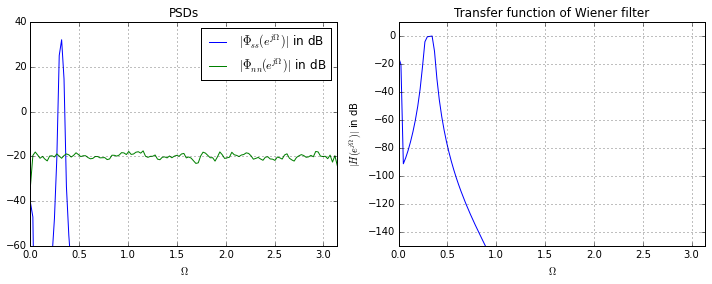

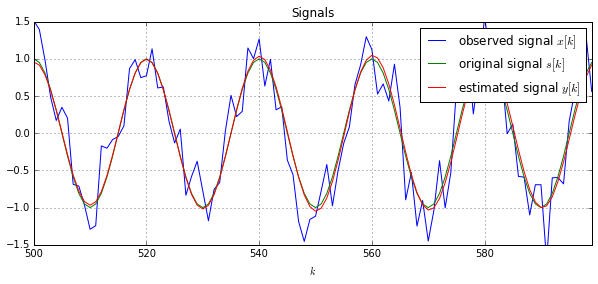

In [2]:
N = 8129  # number of samples
M = 256  # length of Wiener filter
Om0 = 0.1*np.pi  # frequency of original signal
N0 = .1  # PSD of additive white noise

# generate original signal
s = np.cos(Om0 * np.arange(N)) 
# generate observed signal
g = 1/20*np.asarray([1, 2, 3, 4, 5, 4, 3, 2, 1])
n = np.random.normal(size=N, scale=np.sqrt(N0))
x = np.convolve(s, g, mode='same') + n
# estimate PSD
f, Pss = sig.csd(s, s, nperseg=M)
f, Pnn = sig.csd(n, n, nperseg=M)
# compute Wiener filter
G = np.fft.rfft(g, M)
H = 1/G * (np.abs(G)**2 / (np.abs(G)**2 + N0/Pss))
H = H * np.exp(-1j*2*np.pi/len(H)*np.arange(len(H))*(len(H)//2-8))  # shift for causal filter
h = np.fft.irfft(H)
# apply Wiener filter to observation
y = np.convolve(x, h, mode='same')

# plot (cross) PSDs
Om = np.linspace(0, np.pi, num=len(H))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(Om, 20*np.log10(np.abs(.5*Pss)), label=r'$| \Phi_{ss}(e^{j \Omega}) |$ in dB')
plt.plot(Om, 20*np.log10(np.abs(.5*Pnn)), label=r'$| \Phi_{nn}(e^{j \Omega}) |$ in dB')
plt.title('PSDs')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -60, 40])
plt.grid()

# plot transfer function of Wiener filter
plt.subplot(122)
plt.plot(Om, 20*np.log10(np.abs(H)))
plt.title('Transfer function of Wiener filter')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$| H(e^{j \Omega}) |$ in dB')
plt.axis([0, np.pi, -150, 10])
plt.grid()
plt.tight_layout()

# plot signals
idx = np.arange(500, 600)
plt.figure(figsize=(10, 4))
plt.plot(idx, x[idx], label=r'observed signal $x[k]$')
plt.plot(idx, s[idx], label=r'original signal $s[k]$')
plt.plot(idx, y[idx], label=r'estimated signal $y[k]$')
plt.title('Signals')
plt.xlabel(r'$k$')
plt.axis([idx[0], idx[-1], -1.5, 1.5])
plt.legend()
plt.grid()

**Exercise**

* What is different compared to the general Wiener filter? Why?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>